In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------- -------------- 4.5/7.0 MB 25.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 19.2 MB/s  0:00:00

   -------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

cursor.execute("DELETE FROM sales")

sales_data = [
    ("Laptop", 5, 60000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 15000),
    ("Headphones", 15, 2000)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

In [4]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df

,product,total_quantity,revenue
0,Headphones,15,30000.0
1,Laptop,5,300000.0
2,Mobile,10,200000.0
3,Tablet,7,105000.0


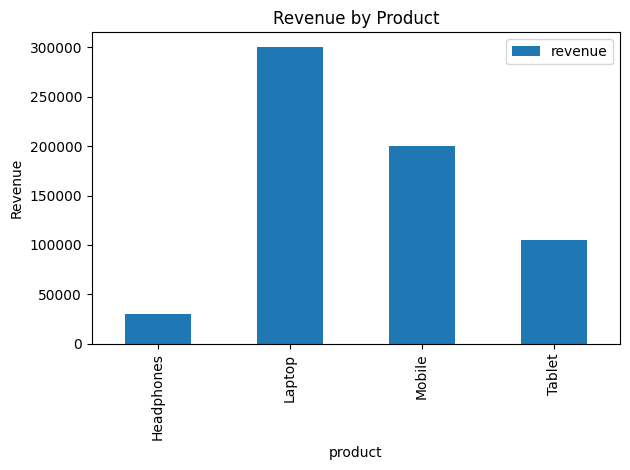

In [5]:
df.plot(kind="bar", x="product", y="revenue")
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [6]:
conn.close()